## 1. Importing necessary libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
sns.set_theme(style='darkgrid',palette='rainbow')

## 2. Importing data

In [13]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3. Data Understanding

In [14]:
cars_data.shape

(81, 5)

In [15]:
cars_data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [16]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

<AxesSubplot:>

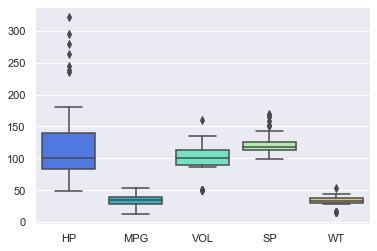

In [17]:
sns.boxplot(data=cars_data)

In [18]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


## 4. Assumptions Check

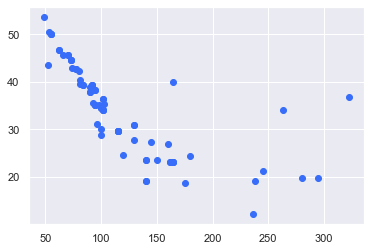

In [19]:
plt.scatter(x = 'HP', y = 'MPG' ,data = cars_data)

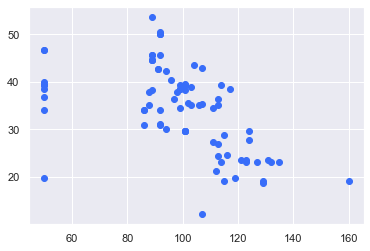

In [20]:
plt.scatter(x = 'VOL', y = 'MPG' ,data = cars_data)

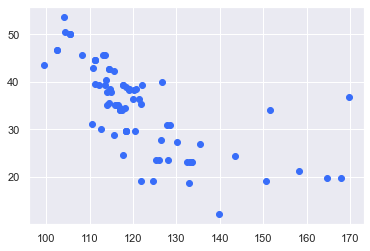

In [21]:
plt.scatter(x = 'SP', y = 'MPG' ,data = cars_data)

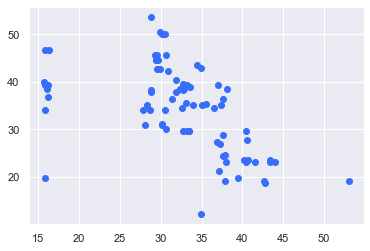

In [22]:
plt.scatter(x = 'WT', y = 'MPG' ,data = cars_data)

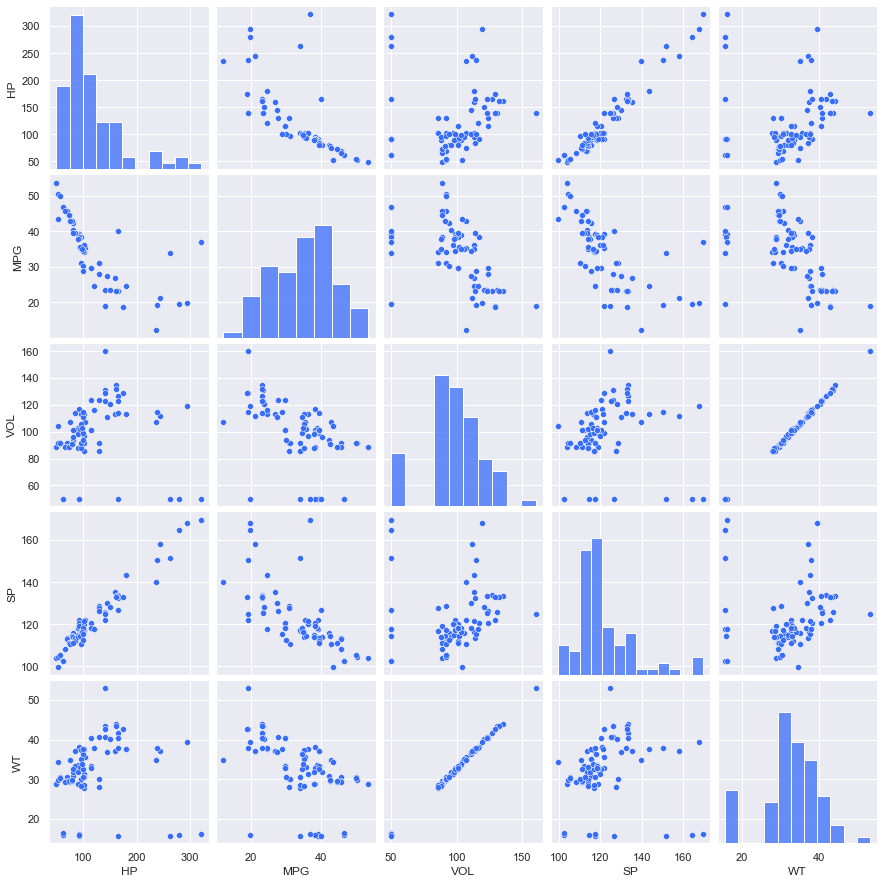

In [23]:
sns.pairplot(cars_data)

## Multicollinearity

* correlation matrix
* Variance inflation factor

In [24]:
cars_data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [25]:
model=smf.ols('MPG~HP+VOL+SP+WT',data=cars_data).fit()

In [26]:
model.pvalues

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

In [27]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [28]:
model=smf.ols('MPG~HP+VOL+SP',data=cars_data).fit()

In [29]:
model.pvalues

Intercept    4.194554e-02
HP           8.644870e-07
VOL          1.648229e-13
SP           1.207855e-02
dtype: float64

In [30]:
model.params

Intercept    29.923389
HP           -0.206705
VOL          -0.201651
SP            0.400659
dtype: float64

In [31]:
model=smf.ols('MPG~HP+SP+WT',data=cars_data).fit()

In [32]:
model.pvalues

Intercept    5.053995e-02
HP           7.560276e-07
SP           1.089096e-02
WT           1.914892e-13
dtype: float64

In [33]:
model.params

Intercept    28.784808
HP           -0.208502
SP            0.407753
WT           -0.599413
dtype: float64

# List Comprehesion

In [34]:
lst=[]
for i in range(1,10):
    print (i)
    

1
2
3
4
5
6
7
8
9


In [35]:
lst


[]

In [36]:
lst=[]
for i in range(1,10):
    lst.append(i*i)
lst    

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [37]:
#Calculate the square of each number within a range of 1 to 25 using List Comprehension


In [38]:
lst1=[]
for i in range(1,26):
    lst1.append(i**2)
lst1   

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625]

# Variance Inflation factor(VIF)-I/P


In [44]:
df=cars_data[['HP','VOL','SP','WT']]
df

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [45]:
#Variance Inflation factor
# MultiCollinearity - High multicollinearit columns can be dropped
import numpy as np
X = np.array(df)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
#vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])] 
vif = [variance_inflation_factor(X,i) for i in range(0,4)]
print(vif)
#X=pd.DataFrame()

[11.19129601632287, 12708.789368875166, 50.54196822792541, 12172.827328054147]


In [42]:
X

array([[ 49.        ,  53.70068138,  89.        , 104.1853528 ,
         28.7620589 ],
       [ 55.        ,  50.01340115,  92.        , 105.4612635 ,
         30.46683298],
       [ 55.        ,  50.01340115,  92.        , 105.4612635 ,
         30.19359657],
       [ 70.        ,  45.69632238,  92.        , 113.4612635 ,
         30.63211391],
       [ 53.        ,  50.50423183,  92.        , 104.4612635 ,
         29.88914864],
       [ 70.        ,  45.69632238,  89.        , 113.1853528 ,
         29.59176832],
       [ 55.        ,  50.01340115,  92.        , 105.4612635 ,
         30.30847957],
       [ 62.        ,  46.71655428,  50.        , 102.5985128 ,
         15.84775807],
       [ 62.        ,  46.71655428,  50.        , 102.5985128 ,
         16.35948352],
       [ 80.        ,  42.29907817,  94.        , 115.6452041 ,
         30.92015417],
       [ 73.        ,  44.65283424,  89.        , 111.1853528 ,
         29.36334142],
       [ 92.        ,  39.3540941 ,  50.   

In [ ]:
As per EDA  Wt Column is having High VIF So we can drop WT and create model with remaining Column

# Model Validation Tecchnique

# Model Building

In [49]:
model=smf.ols('MPG~HP+VOL+SP',data=cars_data).fit()

# 1.Residual Plot(Homoscaracity)

In [51]:
model.params

Intercept    29.923389
HP           -0.206705
VOL          -0.201651
SP            0.400659
dtype: float64

In [52]:
model.rsquared

0.770368341321302

In [53]:
model.fittedvalues

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [54]:
model.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

Text(0, 0.5, 'Residuals')

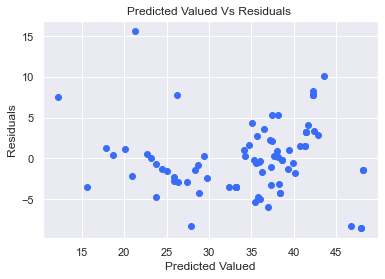

In [55]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Predicted Valued Vs Residuals ')
plt.xlabel('Predicted Valued')
plt.ylabel('Residuals')

In [66]:
import statsmodels.api as sm

C:\Users\ds\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ds\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 2 QQPlot(Best Fitted Value)

In [59]:
# QQPlot
model.params

Intercept    29.923389
HP           -0.206705
VOL          -0.201651
SP            0.400659
dtype: float64

In [62]:
model.fittedvalues

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [63]:
model.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

C:\Users\ds\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


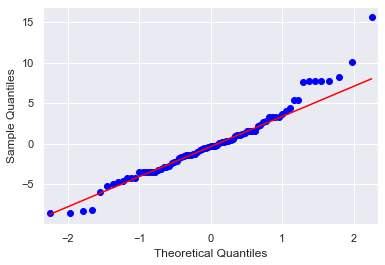

In [71]:
#import statsmodels.api as sm -To get QQ  Plot 
sm.qqplot(model.resid,line='q');  # ; for avoid repeated Visualization

# 3 Residual Vs Regressor

In [ ]:
# Vol

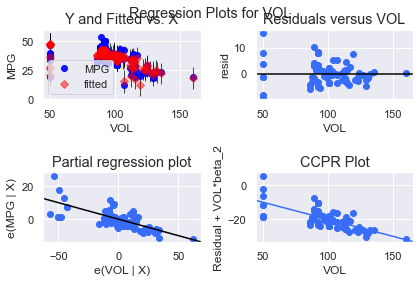

In [73]:
sm.graphics.plot_regress_exog(model,'VOL');

# Model Detection Technique

In [76]:
# Detecting Infuences& Outliers in Model
inf=model.get_influence()

In [78]:
#Calculate the Cooks Distance
c,p=inf.cooks_distance
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

Text(0.5, 1.0, 'Cooks Distance Plot')

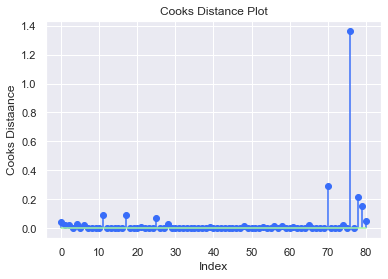

In [81]:
# Cooks Distance Plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distaance')
plt.title('Cooks Distance Plot')

In [82]:
np.argmax(c),np.max(c)# Argmax will give highest value Index 

(76, 1.3641743869103315)

In [83]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [84]:
cars_data.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [85]:
cars_data.drop(index=76,inplace=True)
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [86]:
#reset index

cars_data.reset_index(inplace=True)

cars_data


,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [89]:
cars_data.drop(columns='index',inplace=True)
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [91]:
cars_data.tail()

,HP,MPG,VOL,SP,WT
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099
79,236,12.101263,107,139.840817,34.948615


In [92]:
cars_data.shape

(80, 5)